In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import json

# üìå Extracci√≥n

In [3]:
json = 'TelecomX_Data.json'
df = pd.read_json(json)
df.head(1)

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   

                                            phone  \
0  {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...

In [4]:
df['account'][0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

#üîß Transformaci√≥n

## Expansion de columnas

In [5]:
# 1. Expandir 'customer' 
customer_expanded = pd.json_normalize(df['customer'])
customer_expanded.columns = ['customer_' + col for col in customer_expanded.columns]
df = df.drop(columns='customer').join(customer_expanded)

# 2. Expandir 'phone'
phone_expanded = pd.json_normalize(df['phone'])
phone_expanded.columns = ['phone_' + col for col in phone_expanded.columns]
df = df.drop(columns='phone').join(phone_expanded)

# 3. Expandir 'internet'
internet_expanded = pd.json_normalize(df['internet'])
internet_expanded.columns = ['internet_' + col for col in internet_expanded.columns]
df = df.drop(columns='internet').join(internet_expanded)

# 4. Expandir 'account'
account_expanded = pd.json_normalize(df['account'])
account_expanded.columns = ['account_' + col for col in account_expanded.columns]
df = df.drop(columns='account').join(account_expanded)



df.head(2)




customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   

  account_PaymentMethod account_Charges.Monthly  account_Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  

[2 rows x 21 columns]

## 

In [6]:
df['account_Charges.Monthly'] = df['account_Charges.Monthly'].astype(float)
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

# üìä Carga y an√°lisis

In [8]:
df.isnull().sum()

customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges.Monthly       0
account_Charges.Total        11
dtype: int64

In [9]:
df[df['account_Charges.Total'].isnull()]


customerID Churn customer_gender  customer_SeniorCitizen  \
975   1371-DWPAZ    No          Female                       0   
1775  2520-SGTTA    No          Female                       0   
1955  2775-SEFEE    No            Male                       0   
2075  2923-ARZLG    No            Male                       0   
2232  3115-CZMZD    No            Male                       0   
2308  3213-VVOLG    No            Male                       0   
2930  4075-WKNIU    No          Female                       0   
3134  4367-NUYAO    No            Male                       0   
3203  4472-LVYGI    No          Female                       0   
4169  5709-LVOEQ    No          Female                       0   
5599  7644-OMVMY    No            Male                       0   

     customer_Partner customer_Dependents  customer_tenure phone_PhoneService  \
975               Yes                 Yes                0                 No   
1775              Yes                 Yes                0                Yes   
1955               No                 Yes                0                Yes   
2075              Yes                 Yes                0                Yes   
2232               No                 Yes                0                Yes   
2308              Yes                 Yes                0                Yes   
2930              Yes                 Yes                0                Yes   
3134              Yes                 Yes                0                Yes   
3203              Yes                 Yes                0                 No   
4169              Yes                 Yes                0                Yes   
5599              Yes                 Yes                0                Yes   

     phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
975     No phone service                      DSL  ...                   Yes   
1775                  No                       No  ...   No internet service   
1955                 Yes                      DSL  ...                   Yes   
2075                  No                       No  ...   No internet service   
2232                  No                       No  ...   No internet service   
2308                 Yes                       No  ...   No internet service   
2930                 Yes                      DSL  ...                   Yes   
3134                 Yes                       No  ...   No internet service   
3203    No phone service                      DSL  ...                    No   
4169                  No                      DSL  ...                   Yes   
5599                  No                       No  ...   No internet service   

     internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
975                        Yes                  Yes                  Yes   
1775       No internet service  No internet service  No internet service   
1955                        No                  Yes                   No   
2075       No internet service  No internet service  No internet service   
2232       No internet service  No internet service  No internet service   
2308       No internet service  No internet service  No internet service   
2930                       Yes                  Yes                  Yes   
3134       No internet service  No internet service  No internet service   
3203                       Yes                  Yes                  Yes   
4169                       Yes                   No                  Yes   
5599       No internet service  No internet service  No internet service   

     internet_StreamingMovies account_Contract account_PaperlessBilling  \
975                        No         Two year                       No   
1775      No internet service         Two year                       No   
1955                       No         Two year                      Yes   
2075      No internet service         One year                    

In [10]:
df[df['customer_tenure']== 0]

customerID Churn customer_gender  customer_SeniorCitizen  \
975   1371-DWPAZ    No          Female                       0   
1775  2520-SGTTA    No          Female                       0   
1955  2775-SEFEE    No            Male                       0   
2075  2923-ARZLG    No            Male                       0   
2232  3115-CZMZD    No            Male                       0   
2308  3213-VVOLG    No            Male                       0   
2930  4075-WKNIU    No          Female                       0   
3134  4367-NUYAO    No            Male                       0   
3203  4472-LVYGI    No          Female                       0   
4169  5709-LVOEQ    No          Female                       0   
5599  7644-OMVMY    No            Male                       0   

     customer_Partner customer_Dependents  customer_tenure phone_PhoneService  \
975               Yes                 Yes                0                 No   
1775              Yes                 Yes                0                Yes   
1955               No                 Yes                0                Yes   
2075              Yes                 Yes                0                Yes   
2232               No                 Yes                0                Yes   
2308              Yes                 Yes                0                Yes   
2930              Yes                 Yes                0                Yes   
3134              Yes                 Yes                0                Yes   
3203              Yes                 Yes                0                 No   
4169              Yes                 Yes                0                Yes   
5599              Yes                 Yes                0                Yes   

     phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
975     No phone service                      DSL  ...                   Yes   
1775                  No                       No  ...   No internet service   
1955                 Yes                      DSL  ...                   Yes   
2075                  No                       No  ...   No internet service   
2232                  No                       No  ...   No internet service   
2308                 Yes                       No  ...   No internet service   
2930                 Yes                      DSL  ...                   Yes   
3134                 Yes                       No  ...   No internet service   
3203    No phone service                      DSL  ...                    No   
4169                  No                      DSL  ...                   Yes   
5599                  No                       No  ...   No internet service   

     internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
975                        Yes                  Yes                  Yes   
1775       No internet service  No internet service  No internet service   
1955                        No                  Yes                   No   
2075       No internet service  No internet service  No internet service   
2232       No internet service  No internet service  No internet service   
2308       No internet service  No internet service  No internet service   
2930                       Yes                  Yes                  Yes   
3134       No internet service  No internet service  No internet service   
3203                       Yes                  Yes                  Yes   
4169                       Yes                   No                  Yes   
5599       No internet service  No internet service  No internet service   

     internet_StreamingMovies account_Contract account_PaperlessBilling  \
975                        No         Two year                       No   
1775      No internet service         Two year                       No   
1955                       No         Two year                      Yes   
2075      No internet service         One year                    

## Verificacion de cliente 'Churn'

In [11]:
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)  # Porcentajes

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [12]:
df[df['Churn']== '']

customerID Churn customer_gender  customer_SeniorCitizen  \
30    0047-ZHDTW                Female                       0   
75    0120-YZLQA                  Male                       0   
96    0154-QYHJU                  Male                       0   
98    0162-RZGMZ                Female                       1   
175   0274-VVQOQ                  Male                       1   
...          ...   ...             ...                     ...   
7158  9840-GSRFX                Female                       0   
7180  9872-RZQQB                Female                       0   
7211  9920-GNDMB                  Male                       0   
7239  9955-RVWSC                Female                       0   
7247  9966-VYRTZ                Female                       0   

     customer_Partner customer_Dependents  customer_tenure phone_PhoneService  \
30                 No                  No               11                Yes   
75                 No                  No               71                Yes   
96                 No                  No               29                Yes   
98                 No                  No                5                Yes   
175               Yes                  No               65                Yes   
...               ...                 ...              ...                ...   
7158               No                  No               14                Yes   
7180              Yes                  No               49                 No   
7211               No                  No                9                Yes   
7239              Yes                 Yes               67                Yes   
7247              Yes                 Yes               31                Yes   

     phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
30                   Yes              Fiber optic  ...                    No   
75                    No                       No  ...   No internet service   
96                    No                      DSL  ...                   Yes   
98                    No                      DSL  ...                   Yes   
175                  Yes              Fiber optic  ...                   Yes   
...                  ...                      ...  ...                   ...   
7158                 Yes                      DSL  ...                   Yes   
7180    No phone service                      DSL  ...                    No   
7211                 Yes              Fiber optic  ...                    No   
7239                  No                       No  ...   No internet service   
7247                  No                       No  ...   No internet service   

     internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
30                          No                   No                   No   
75         No internet service  No internet service  No internet service   
96                          No                  Yes                   No   
98                          No                  Yes                   No   
175                        Yes                   No                  Yes   
...                        ...                  ...                  ...   
7158                        No                   No                   No   
7180                        No                   No                  Yes   
7211                        No                   No                   No   
7239       No internet service  No internet service  No internet service   
7247       No internet service  No internet service  No internet service   

     internet_StreamingMovies account_Contract account_PaperlessBilling  \
30                         No   Month-to-month                      Yes   
75        No internet service         Two year                      Yes   
96                         No         One year                      Yes   
98                         No   Month-to-month                    

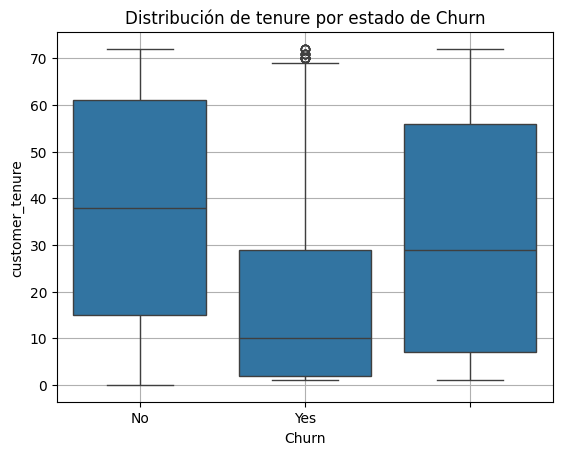

In [13]:
sns.boxplot(x='Churn', y='customer_tenure', data=df)
plt.title('Distribuci√≥n de tenure por estado de Churn')
plt.grid()
plt.show()

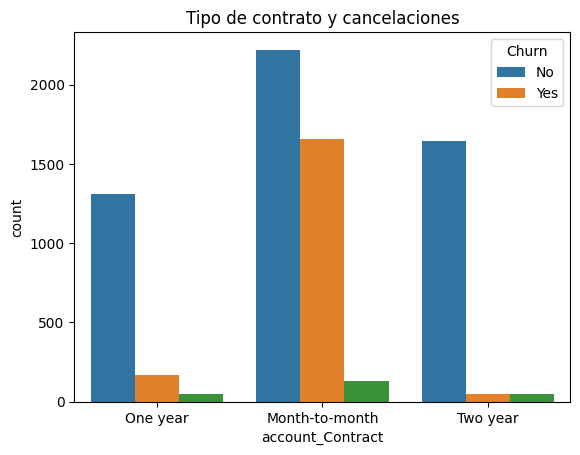

In [14]:
sns.countplot(x='account_Contract', hue='Churn', data=df)
plt.title('Tipo de contrato y cancelaciones')
plt.show()

## Cancelaciones y grupos etarios

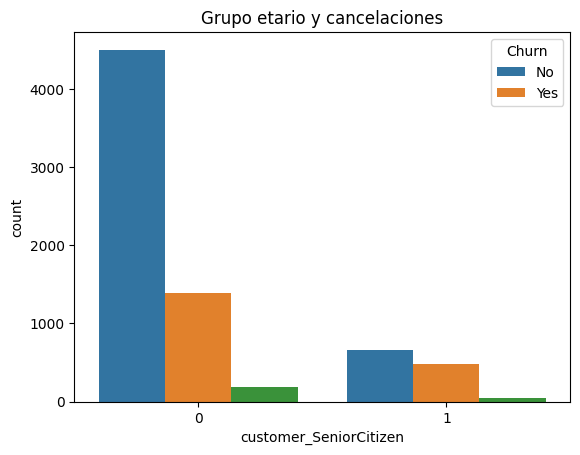

In [15]:
sns.countplot(x='customer_SeniorCitizen', hue='Churn', data=df)
plt.title('Grupo etario y cancelaciones')
plt.show()

In [16]:
churn_young = df[(df['Churn'] == 'Yes') & (df['customer_SeniorCitizen'] == 0)]
young = df[df['customer_SeniorCitizen'] == 0]
churn_senior = df[(df['Churn'] == 'Yes') & (df['customer_SeniorCitizen'] == 1)]
senior = df[df['customer_SeniorCitizen'] == 1]
print(f"Total de clientes: {len(df)}")
print(f"Total de clientes j√≥venes: {len(young)}")
print(f"Total de clientes mayores: {len(senior)}")
print(f"Churn menores de 65 a√±os: {len(churn_young)}")
print(f"Churn mayores de 65 a√±os: {len(churn_senior)}")
print(f'porcentaje de cancelaciones entre menores de 65 a√±os {(len(churn_young) / len(young)) * 100:.2f}%')
print(f'porcentaje de cancelaciones de mayores de 65 a√±os {(len(churn_senior) / len(senior)) * 100:.2f}%')



Total de clientes: 7267
Total de clientes j√≥venes: 6085
Total de clientes mayores: 1182
Churn menores de 65 a√±os: 1393
Churn mayores de 65 a√±os: 476
porcentaje de cancelaciones entre menores de 65 a√±os 22.89%
porcentaje de cancelaciones de mayores de 65 a√±os 40.27%


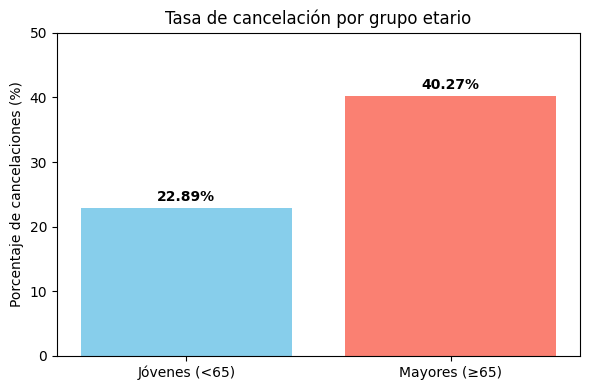

In [17]:

# Datos
grupos = ['J√≥venes (<65)', 'Mayores (‚â•65)']
tasas = [22.89, 40.27]

# Crear gr√°fico
plt.figure(figsize=(6, 4))
plt.bar(grupos, tasas, color=['skyblue', 'salmon'])

# T√≠tulos y etiquetas
plt.title('Tasa de cancelaci√≥n por grupo etario')
plt.ylabel('Porcentaje de cancelaciones (%)')
plt.ylim(0, 50)

# Mostrar porcentaje arriba de las barras
for i, tasa in enumerate(tasas):
  plt.text(i, tasa + 1, f'{tasa:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

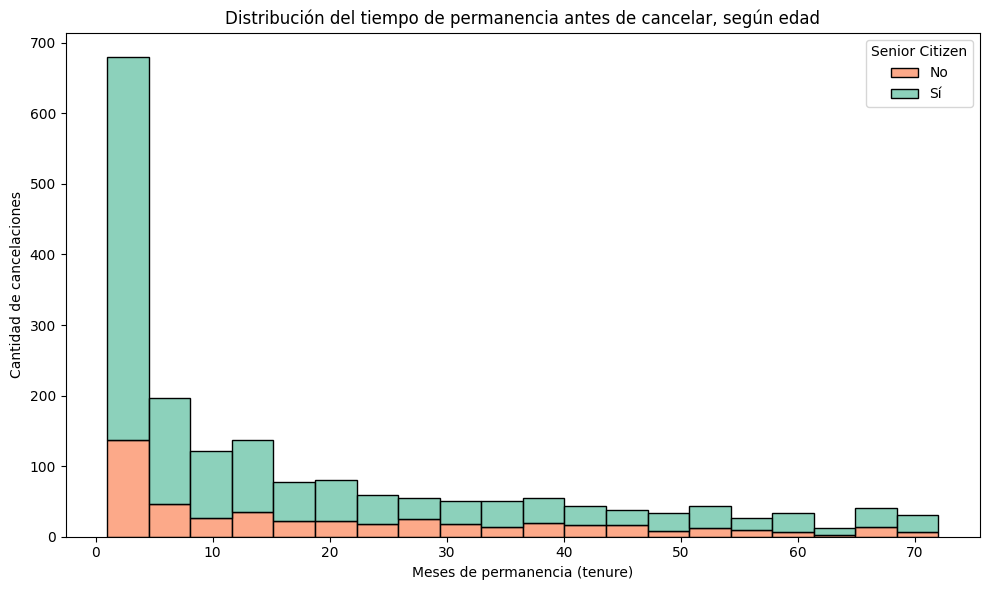

In [112]:
# Filtramos solo los clientes que cancelaron
churn_df = df[df['Churn'] == 'Yes']

# Configuramos el gr√°fico
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_df, x='customer_tenure', hue='customer_SeniorCitizen', multiple='stack', palette='Set2', bins=20)

plt.title('Distribuci√≥n del tiempo de permanencia antes de cancelar, seg√∫n edad')
plt.xlabel('Meses de permanencia (tenure)')
plt.ylabel('Cantidad de cancelaciones')
plt.legend(title='Senior Citizen', labels=['No', 'S√≠'])
plt.tight_layout()
plt.show()

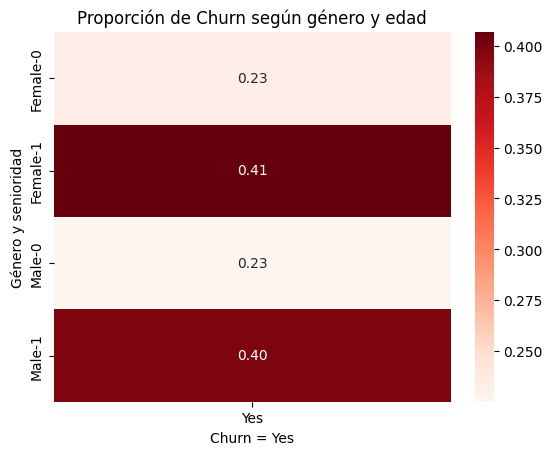

In [110]:
pivot = pd.crosstab(index=[df['customer_gender'], df['customer_SeniorCitizen']], columns=df['Churn'])
pivot_ratio = pivot.div(pivot.sum(axis=1), axis=0)

sns.heatmap(pivot_ratio[['Yes']], annot=True, cmap='Reds', fmt=".2f")
plt.title('Proporci√≥n de Churn seg√∫n g√©nero y edad')
plt.ylabel('G√©nero y senioridad')
plt.xlabel('Churn = Yes')
plt.show()

## Cancelaciones y servicios contratados

Clientes exclusivos de internet que cancelaron: 170 y representan el 9.10% del total de cancelaciones
Clientes exclusivos de telefon√≠a que cancelaron: 113 y representan el 6.05% del total de cancelaciones
Total de clientes que cancelaron: 1869


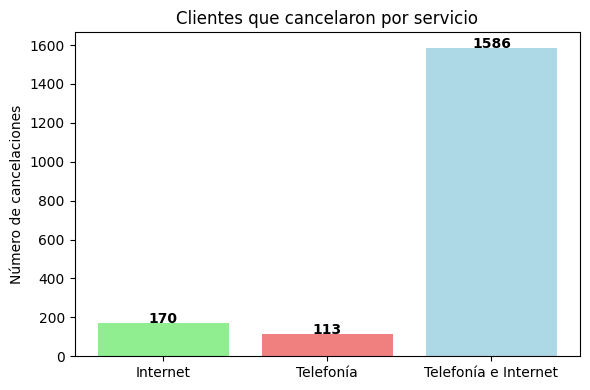

In [52]:
churn_internet = df[(df['Churn'] == 'Yes') & (df['phone_PhoneService'] == "No")].copy()
churn_phone = df[(df['Churn'] == 'Yes') & (df['internet_InternetService'] == "No")].copy()
churn_total = df[df['Churn'] == 'Yes'].copy()
churn_rest = df[(df['Churn'] == 'Yes') & (df['phone_PhoneService'] == "Yes") & (df['internet_InternetService'] != "No")].copy()

print(f'Clientes exclusivos de internet que cancelaron: {len(churn_internet)} y representan el {(len(churn_internet) / len(churn_total)) * 100:.2f}% del total de cancelaciones')
print(f'Clientes exclusivos de telefon√≠a que cancelaron: {len(churn_phone)} y representan el {(len(churn_phone) / len(churn_total)) * 100:.2f}% del total de cancelaciones')
print(f'Total de clientes que cancelaron: {len(churn_total)}')


# Datos
grupos = ['Internet', 'Telefon√≠a', 'Telefon√≠a e Internet']
tasas = [len(churn_internet), len(churn_phone), len(churn_rest)]
# Crear gr√°fico
plt.figure(figsize=(6, 4))
plt.bar(grupos, tasas, color=['lightgreen', 'lightcoral', 'lightblue'])
# T√≠tulos y etiquetas
plt.title('Clientes que cancelaron por servicio')
plt.ylabel('N√∫mero de cancelaciones')
# Mostrar n√∫mero de cancelaciones arriba de las barras  
for i, tasa in enumerate(tasas):
    plt.text(i, tasa + 1, f'{tasa}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()



### Servicios de Internet contratados entre las cancelaciones

Clientes con Churn que solo ten√≠an Internet y ning√∫n servicio adicional: 40 / 170
Eso es el 23.53%
Clientes con Churn que no contrataban ning√∫n servicio adicional: 374 / 1586
Eso es el 23.58%


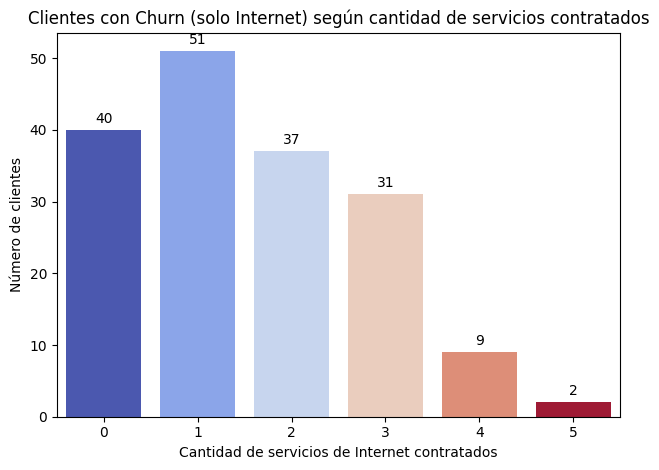

Clientes con Churn que no contrataban ning√∫n servicio adicional: 527 / 1869
Eso es el 28.20%


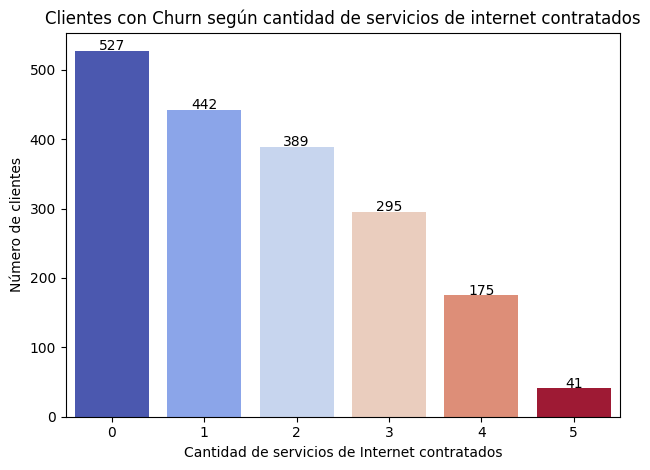

In [54]:
# Columnas de servicios
internet_services = ['internet_OnlineBackup', 'internet_DeviceProtection',
                     'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies']

# Crear una columna que cuenta cu√°ntos "Yes" tiene cada fila
churn_internet['num_services_yes'] = churn_internet[internet_services].apply(lambda row: (row == 'Yes').sum(), axis=1)

# Ver cu√°ntos clientes ten√≠an CERO servicios contratados
no_services_count = (churn_internet['num_services_yes'] == 0).sum()
total_churn_internet = churn_internet.shape[0]

print(f"Clientes con Churn que solo ten√≠an Internet y ning√∫n servicio adicional: {no_services_count} / {total_churn_internet}")
print(f"Eso es el {no_services_count / total_churn_internet * 100:.2f}%")


# Crear una columna que cuenta cu√°ntos "Yes" tiene cada fila
churn_rest['num_services_yes'] = churn_rest[internet_services].apply(lambda row: (row == 'Yes').sum(), axis=1)

# Ver cu√°ntos clientes ten√≠an CERO servicios contratados
no_services_count_rest = (churn_rest['num_services_yes'] == 0).sum()
total_churn_rest = churn_rest.shape[0]

# Crear una columna que cuenta cu√°ntos "Yes" tiene cada fila
churn_total['num_services_yes'] = churn_total[internet_services].apply(lambda row: (row == 'Yes').sum(), axis=1)

# Ver cu√°ntos clientes ten√≠an CERO servicios contratados
no_services_count_total = (churn_total['num_services_yes'] == 0).sum()
total_churn_total = churn_total.shape[0]

print(f"Clientes con Churn que no contrataban ning√∫n servicio adicional: {no_services_count_rest} / {total_churn_rest}")
print(f"Eso es el {no_services_count_rest / total_churn_rest * 100:.2f}%")

# Histograma de cantidad de servicios contratados (0 a 5)
ax = sns.countplot(data=churn_internet, x='num_services_yes', hue='num_services_yes', palette='coolwarm', legend=False)
plt.title('Clientes con Churn (solo Internet) seg√∫n cantidad de servicios contratados')
plt.xlabel('Cantidad de servicios de Internet contratados')
plt.ylabel('N√∫mero de clientes')
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center")

plt.show()

print(f"Clientes con Churn que no contrataban ning√∫n servicio adicional: {no_services_count_total} / {total_churn_total}")
print(f"Eso es el {no_services_count_total / total_churn_total * 100:.2f}%")

# Histograma de cantidad de servicios contratados (0 a 5)
ax = sns.countplot(data=churn_total, x='num_services_yes', hue='num_services_yes', palette='coolwarm', legend=False)
plt.title('Clientes con Churn seg√∫n cantidad de servicios de internet contratados')
plt.xlabel('Cantidad de servicios de Internet contratados')
plt.ylabel('N√∫mero de clientes')
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center")

plt.show()



internet_StreamingMovies     72
internet_StreamingTV         64
internet_OnlineBackup        51
internet_DeviceProtection    49
internet_TechSupport         28
dtype: int64


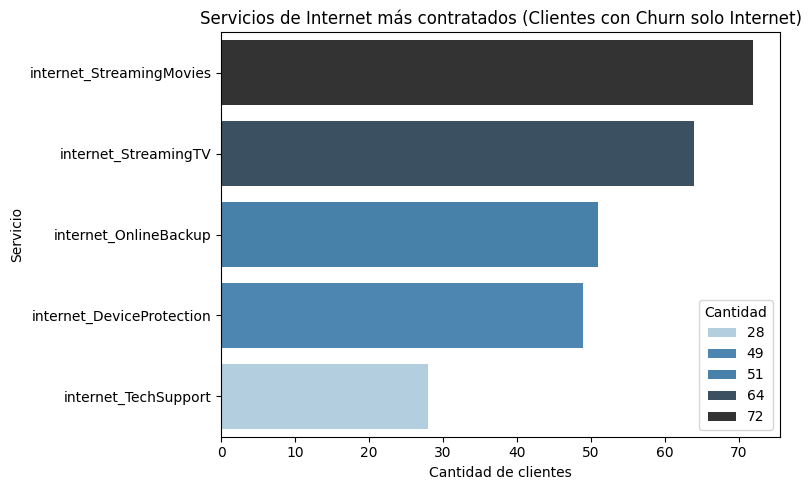

In [60]:
# Contar cu√°ntos clientes contrataron cada servicio
service_counts = (churn_internet[internet_services] == 'Yes').sum().sort_values(ascending=False)

# Mostrar los resultados
print(service_counts)

# Convertir a DataFrame para graficar
service_counts_df = service_counts.reset_index()
service_counts_df.columns = ['Servicio', 'Cantidad']

# Gr√°fico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=service_counts_df, x='Cantidad', y='Servicio', hue= 'Cantidad',palette='Blues_d')
plt.title('Servicios de Internet m√°s contratados (Clientes con Churn solo Internet)')
plt.xlabel('Cantidad de clientes')
plt.ylabel('Servicio')
plt.tight_layout()
plt.show()

internet_StreamingMovies     818
internet_StreamingTV         814
internet_DeviceProtection    545
internet_OnlineBackup        523
internet_TechSupport         310
dtype: int64


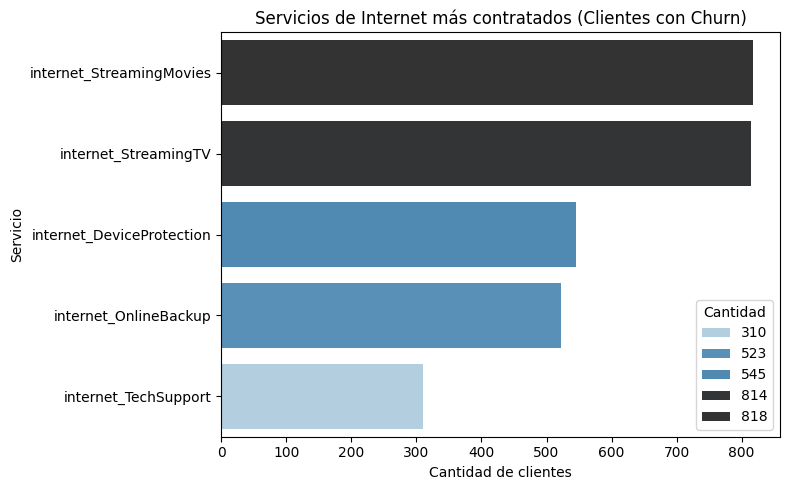

In [62]:

# Contar cu√°ntos clientes contrataron cada servicio
service_counts = (churn_total[internet_services] == 'Yes').sum().sort_values(ascending=False)

# Mostrar los resultados
print(service_counts)

# Convertir a DataFrame para graficar
service_counts_df = service_counts.reset_index()
service_counts_df.columns = ['Servicio', 'Cantidad']

# Gr√°fico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=service_counts_df, x='Cantidad', y='Servicio', hue= 'Cantidad',palette='Blues_d')
plt.title('Servicios de Internet m√°s contratados (Clientes con Churn)')
plt.xlabel('Cantidad de clientes')
plt.ylabel('Servicio')
plt.tight_layout()
plt.show()


In [63]:
# Filtrar clientes que contrataron solo 1 servicio de Internet
solo_un_servicio = churn_internet[churn_internet['num_services_yes'] == 1]

# Para cada fila, obtener el nombre del servicio contratado (el que tiene 'Yes')
servicio_contratado = solo_un_servicio[internet_services].apply(
    lambda row: row[row == 'Yes'].index[0], axis=1
)

# Contar cu√°l fue el servicio √∫nico contratado m√°s frecuente
servicio_counts = servicio_contratado.value_counts()

# Mostrar resultados
print(servicio_counts)


internet_StreamingMovies     15
internet_OnlineBackup        14
internet_TechSupport          9
internet_StreamingTV          8
internet_DeviceProtection     5
Name: count, dtype: int64


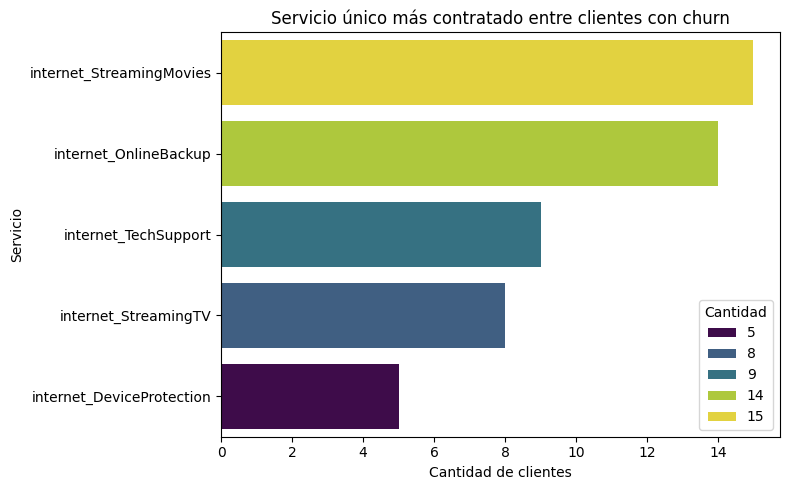

In [65]:
servicio_counts_df = servicio_counts.reset_index()
servicio_counts_df.columns = ['Servicio', 'Cantidad']

plt.figure(figsize=(8, 5))
sns.barplot(data=servicio_counts_df, x='Cantidad', y='Servicio', hue='Cantidad',palette='viridis')
plt.title('Servicio √∫nico m√°s contratado entre clientes con churn')
plt.xlabel('Cantidad de clientes')
plt.ylabel('Servicio')
plt.tight_layout()
plt.show()

internet_StreamingMovies     128
internet_StreamingTV         115
internet_OnlineBackup         99
internet_DeviceProtection     62
internet_TechSupport          38
Name: count, dtype: int64


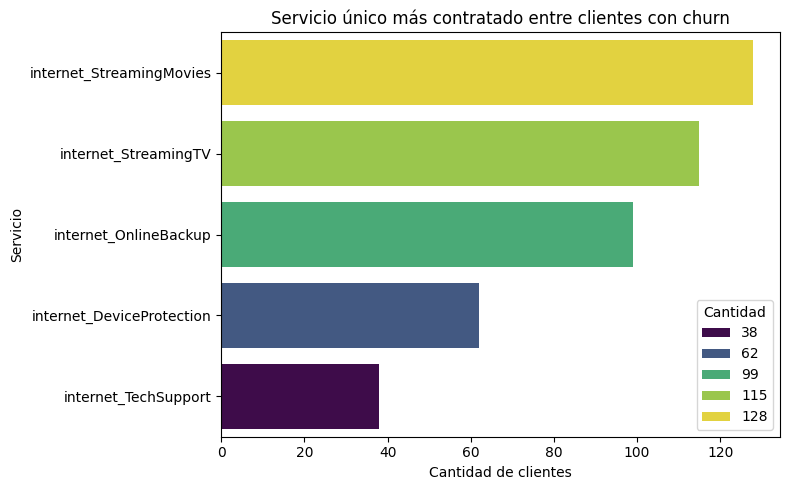

In [66]:
# Filtrar clientes que contrataron solo 1 servicio de Internet
solo_un_servicio = churn_total[churn_total['num_services_yes'] == 1]

# Para cada fila, obtener el nombre del servicio contratado (el que tiene 'Yes')
servicio_contratado = solo_un_servicio[internet_services].apply(
    lambda row: row[row == 'Yes'].index[0], axis=1
)

# Contar cu√°l fue el servicio √∫nico contratado m√°s frecuente
servicio_counts = servicio_contratado.value_counts()

# Mostrar resultados
print(servicio_counts)

servicio_counts_df = servicio_counts.reset_index()
servicio_counts_df.columns = ['Servicio', 'Cantidad']

plt.figure(figsize=(8, 5))
sns.barplot(data=servicio_counts_df, x='Cantidad', y='Servicio', hue='Cantidad',palette='viridis')
plt.title('Servicio √∫nico m√°s contratado entre clientes con churn')
plt.xlabel('Cantidad de clientes')
plt.ylabel('Servicio')
plt.tight_layout()
plt.show()

### Servicios adicionales y cancelaciones

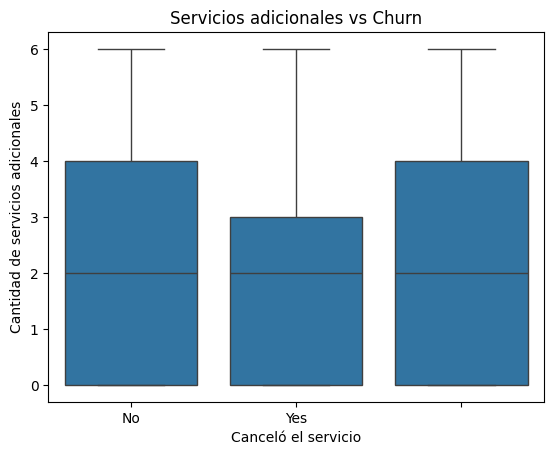

In [82]:
# Contamos cu√°ntos servicios adicionales tiene cada cliente
service_cols = ['internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies']
df['NumServiciosAdicionales'] = df[service_cols].apply(lambda row: sum(row == 'Yes'), axis=1)

# Boxplot del n√∫mero de servicios adicionales por churn
sns.boxplot(x='Churn', y='NumServiciosAdicionales', data=df)
plt.title('Servicios adicionales vs Churn')
plt.xlabel('Cancel√≥ el servicio')
plt.ylabel('Cantidad de servicios adicionales')
plt.show()

### Servicios de Telefon√≠a y cancelaciones

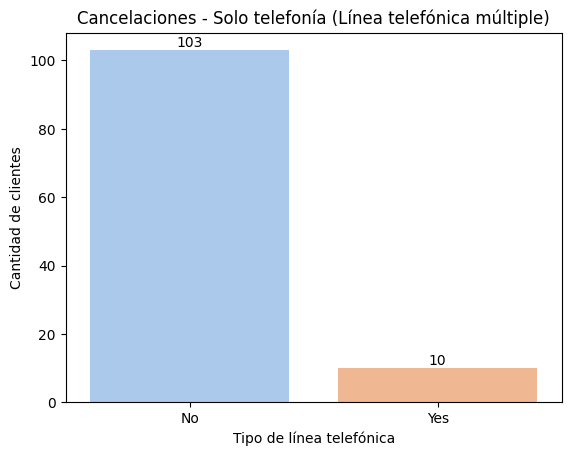

In [71]:
ax = sns.countplot(data=churn_phone, x='phone_MultipleLines', hue='phone_MultipleLines', palette='pastel')
plt.title('Cancelaciones - Solo telefon√≠a (L√≠nea telef√≥nica m√∫ltiple)')
plt.xlabel('Tipo de l√≠nea telef√≥nica')
plt.ylabel('Cantidad de clientes')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center")
plt.show()

In [ ]:
churn_phone['phone_MultipleLines'].value_counts()

phone_MultipleLines
No     103
Yes     10
Name: count, dtype: int64

In [72]:
(churn_phone['phone_MultipleLines'].value_counts(normalize=True) * 100).round(2)

phone_MultipleLines
No     91.15
Yes     8.85
Name: proportion, dtype: float64

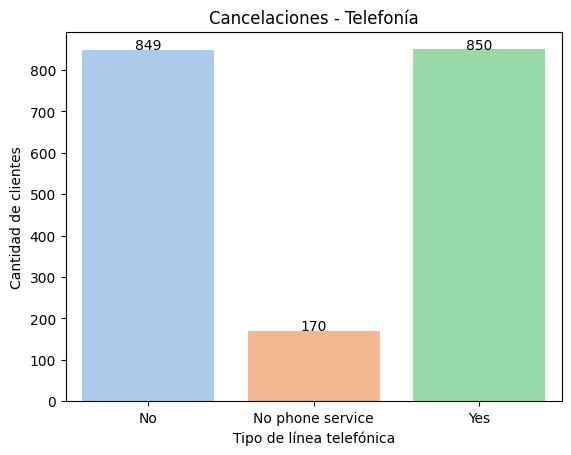

In [76]:
ax = sns.countplot(data=churn_total, x='phone_MultipleLines', hue='phone_MultipleLines', palette='pastel')
plt.title('Cancelaciones - Telefon√≠a')
plt.xlabel('Tipo de l√≠nea telef√≥nica')
plt.ylabel('Cantidad de clientes')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center")
plt.show()

In [74]:
# Comprobamos si los 170 sin servicio de telefon√≠a son los mismos que los 170 exclusivos de internet
set_ids_churn_internet = set(churn_internet.index)
set_ids_no_phone = set(df[(df['Churn'] == 'Yes') & (df['phone_PhoneService'] == "No")].index)

# Verificamos si son los mismos
set_ids_churn_internet == set_ids_no_phone


True

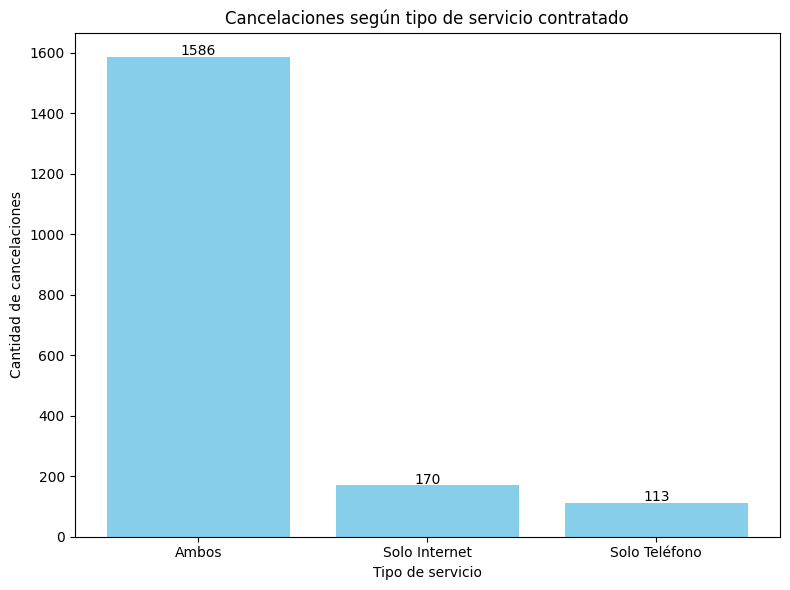

In [77]:


# Clasificamos a cada cliente seg√∫n el tipo de servicio contratado
def clasificar_servicio(row):
    if row['internet_InternetService'] != 'No' and row['phone_PhoneService'] == 'No':
        return 'Solo Internet'
    elif row['internet_InternetService'] == 'No' and row['phone_PhoneService'] == 'Yes':
        return 'Solo Tel√©fono'
    elif row['internet_InternetService'] != 'No' and row['phone_PhoneService'] == 'Yes':
        return 'Ambos'
    else:
        return 'Ninguno'

# Aplicamos la clasificaci√≥n
churn_total['tipo_servicio'] = churn_total.apply(clasificar_servicio, axis=1)

# Conteo por categor√≠a
conteo_servicios = churn_total['tipo_servicio'].value_counts()

# Graficamos
plt.figure(figsize=(8, 6))
bars = plt.bar(conteo_servicios.index, conteo_servicios.values, color='skyblue')
plt.title('Cancelaciones seg√∫n tipo de servicio contratado')
plt.xlabel('Tipo de servicio')
plt.ylabel('Cantidad de cancelaciones')

# A√±adimos etiquetas
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center')

plt.tight_layout()
plt.show()


## M√©todos de pago y canceaciones

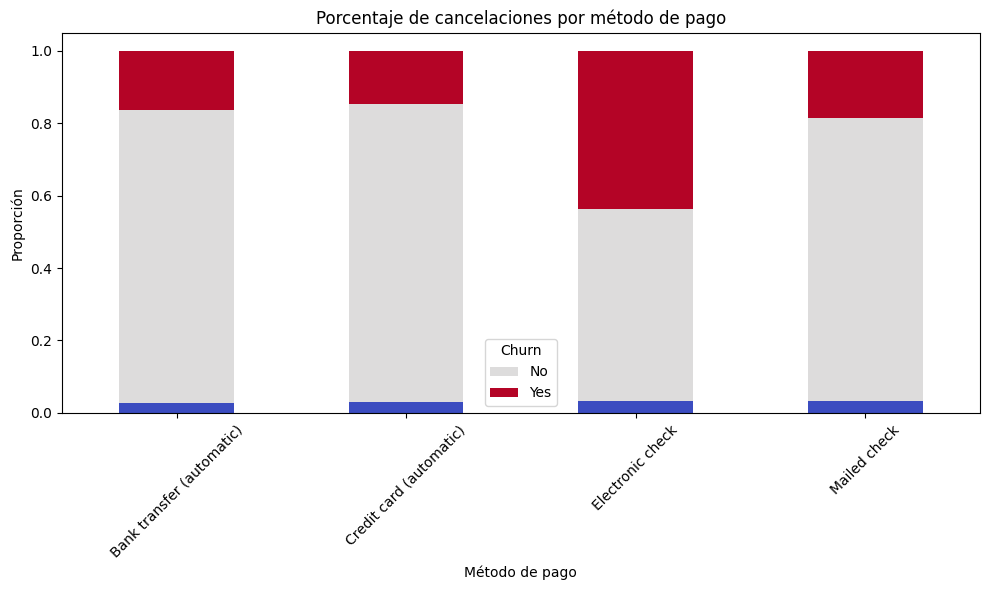

In [79]:


# Gr√°fico de porcentaje de cancelaciones por m√©todo de pago
payment_churn = df.groupby('account_PaymentMethod')['Churn'].value_counts(normalize=True).unstack().fillna(0)

payment_churn.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Porcentaje de cancelaciones por m√©todo de pago')
plt.ylabel('Proporci√≥n')
plt.xlabel('M√©todo de pago')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Tipo de facturaci√≥n y cancelaciones

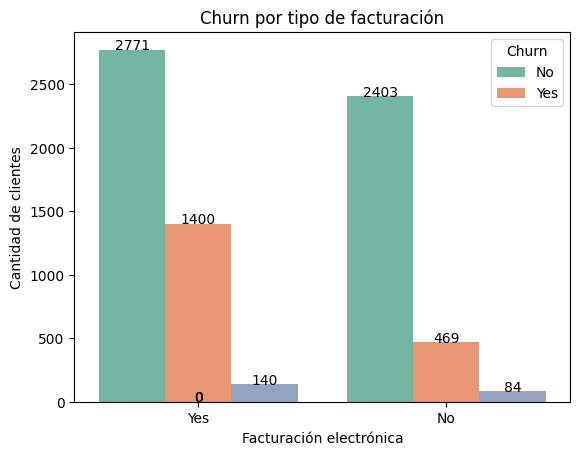

In [105]:
# Gr√°fico de barras agrupado por tipo de facturaci√≥n y cancelaci√≥n
ax = sns.countplot(data=df, x='account_PaperlessBilling', hue='Churn', palette='Set2')
plt.title('Churn por tipo de facturaci√≥n')
plt.xlabel('Facturaci√≥n electr√≥nica')
plt.ylabel('Cantidad de clientes')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height), ha="center")

plt.show()

In [103]:
df[(df['account_PaperlessBilling'] == 'Yes') & (df['Churn'] == 'Yes')]['account_Contract'].value_counts()


account_Contract
Month-to-month    1249
One year           118
Two year            33
Name: count, dtype: int64

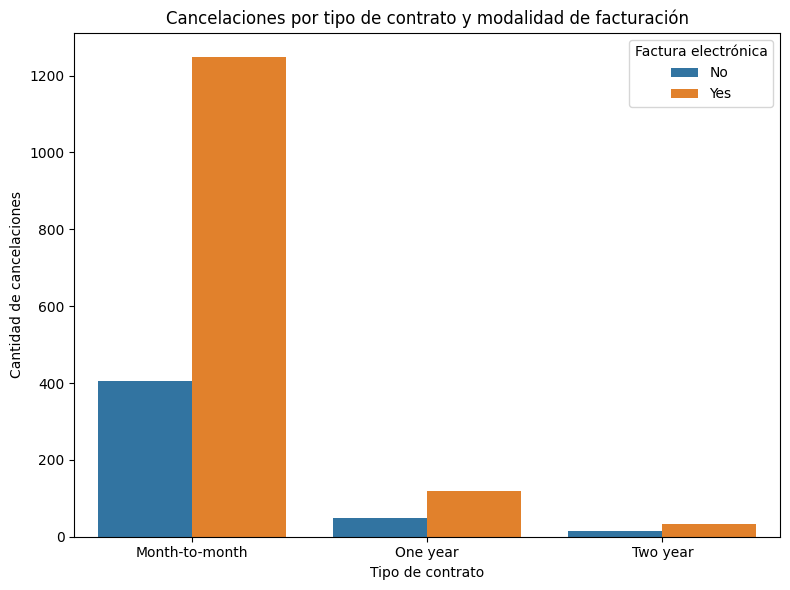

In [106]:
# Filtrar s√≥lo los que cancelaron
df_churn = df[df['Churn'] == 'Yes']

# Agrupar por tipo de contrato y factura electr√≥nica
grouped = df_churn.groupby(['account_Contract', 'account_PaperlessBilling']).size().reset_index(name='count')

# Gr√°fico
plt.figure(figsize=(8,6))
sns.barplot(data=grouped, x='account_Contract', y='count', hue='account_PaperlessBilling')
plt.title('Cancelaciones por tipo de contrato y modalidad de facturaci√≥n')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de cancelaciones')
plt.legend(title='Factura electr√≥nica')
plt.tight_layout()
plt.show()

#üìÑInforme final

En un primer an√°lisis, llam√≥ la atenci√≥n la presencia de valores nulos en la columna de cargos totales. Al examinar esas filas, se observ√≥ que todas tienen un valor de 0 en la columna tenure. Esto sugiere que se trata de clientes recientemente incorporados, a quienes a√∫n no se les ha facturado ning√∫n importe. Esta hip√≥tesis se refuerza al notar que ninguno de estos casos presenta un valor afirmativo en la columna Churn.

Por otra parte, se detectaron 224 registros sin valores en la columna Churn. En estos casos, no es posible extraer conclusiones claras, ya que todos presentan un tenure distinto de cero, cuentan con un contrato activo y poseen valores registrados en los cargos totales. Todo indica que se trata simplemente de datos que no fueron correctamente cargados.

El an√°lisis del diagrama de caja evidencia que la tasa de cancelaci√≥n es m√°s alta durante los primeros meses de permanencia, con una mediana cercana a los 10 meses. Los casos de cancelaci√≥n entre clientes de alta antig√ºedad son poco frecuentes, mientras que quienes permanecen tienden a mantener una relaci√≥n prolongada con la empresa. Esto sugiere que el riesgo de churn es mayor durante los primeros meses, por lo que ser√≠a recomendable implementar estrategias de fidelizaci√≥n espec√≠ficas para clientes nuevos.

En cuanto al tipo de contrato, el gr√°fico de barras muestra que la mayor√≠a de las cancelaciones se producen entre quienes tienen contratos mensuales. Esto podr√≠a reflejar una baja disposici√≥n a comprometerse con planes de mayor duraci√≥n, posiblemente debido a precios poco competitivos o a una percepci√≥n de escaso valor agregado. Adem√°s, se observa que el servicio con mayor cantidad de cancelaciones es el de internet por fibra √≥ptica, lo cual resulta llamativo dado que se trata de una tecnolog√≠a avanzada. Las posibles causas podr√≠an incluir:

* Costos elevados;

* Problemas de calidad o atenci√≥n;

* Experiencias negativas no reflejadas directamente en los datos.

El an√°lisis por edad revela que, aunque los menores de 65 a√±os representan la mayor√≠a de las cancelaciones en t√©rminos absolutos, su proporci√≥n relativa es inferior, ya que representan el 22% de los cancelamientos, frente al 40% correspondiente a personas mayores de esa edad. 
Respecto al genero, se puede decir que no influyen en las cancelaciones. En ambos grupos etarios, se reflejan las mismas proporciones para cada genero.

Del total de cancelaciones, un 9% corresponde a usuarios que solo contrataron servicios de internet, mientras que un 6% eran usuarios exclusivos de telefon√≠a. Al examinar a los clientes que solo contaban con internet, se observa que el 53% contrat√≥ uno o ning√∫n servicio adicional. Esta tendencia tambi√©n se replica en el total de cancelaciones, donde el 51% de los clientes ten√≠an entre 0 y 1 servicios complementarios.

Dentro del grupo de usuarios de internet, tanto en los casos exclusivos como en el total de cancelaciones, los servicios m√°s contratados fueron los de streaming, ya sea de TV o de pel√≠culas. Al enfocar el an√°lisis en aquellos clientes que contrataron un √∫nico servicio adicional, se destacan el streaming de pel√≠culas y el respaldo en la nube (Online Backup) como los m√°s elegidos por quienes solo ten√≠an internet. Esta tendencia tambi√©n se refleja en el total de cancelaciones.

Estos resultados sugieren que los servicios de streaming y backup en la nube poseen un alto valor percibido por los clientes. Dise√±ar promociones, paquetes o estrategias de retenci√≥n centradas en estos servicios podr√≠a contribuir significativamente a reducir la tasa de cancelaci√≥n.

El diagrama de caja Servicios adicionales vs Churn sugiere que a mayor cantidad de servicios adicionales contratados, menor es la probabilidad de que un cliente cancele el servicio. Es decir, los servicios adicionales parecen aumentar la retenci√≥n de clientes.

En el caso de los clientes que solo contrataron servicios de telefon√≠a y cancelaron el servicio, se observa que el 91% (103 de 113) contaban con una √∫nica l√≠nea, mientras que solo el 9% (10 de 113) ten√≠an l√≠neas m√∫ltiples. Esto sugiere que los clientes con m√∫ltiples l√≠neas podr√≠an estar m√°s fidelizados o comprometidos, posiblemente debido a beneficios adicionales, descuentos por volumen o una mayor necesidad del servicio. Ser√≠a recomendable investigar las diferencias en t√©rminos de retenci√≥n entre estos dos grupos.

Finalmente, se constat√≥ que los 170 clientes que cancelaron sin haber contratado telefon√≠a coincidieron exactamente con quienes solo ten√≠an servicios de internet. Esto refuerza la hip√≥tesis de que los usuarios que contratan un √∫nico tipo de servicio, sin combinaciones ni personalizaciones, presentan mayor propensi√≥n a cancelar. Promover paquetes combinados o beneficios adicionales por contrataci√≥n de m√∫ltiples servicios podr√≠a ser una estrategia efectiva para reducir el churn en este segmento.

Se observa una clara relaci√≥n entre el m√©todo de pago y la probabilidad de cancelaci√≥n. Los clientes que utilizan pagos autom√°ticos (ya sea por transferencia bancaria o tarjeta de cr√©dito) tienen tasas de cancelaci√≥n significativamente menores. Por el contrario, los que pagan mediante electronic check presentan la tasa de churn m√°s alta. Esto sugiere que fomentar los m√©todos de pago autom√°ticos podr√≠a ser una estrategia eficaz para mejorar la retenci√≥n de clientes.

Al analizar la relaci√≥n entre la cancelaci√≥n del servicio y la modalidad de facturaci√≥n, se observa que la gran mayor√≠a de los clientes que cancelan utilizan factura electr√≥nica (Paperless Billing). En efecto, del total de cancelaciones, m√°s de 1400 casos corresponden a esta modalidad.

Cuando se cruza este dato con el tipo de contrato, se encuentra que 1249 de esos casos est√°n asociados a contratos mes a mes, que es justamente el contrato con la mayor tasa de cancelaci√≥n.

Esto refuerza la hip√≥tesis de que los clientes que eligen factura electr√≥nica tienden a ser m√°s recientes, con una relaci√≥n menos consolidada con la empresa. Esta tendencia se alinea con lo observado en el gr√°fico de tenure, que muestra una concentraci√≥n de cancelaciones en los primeros meses de servicio.

En contraste, los clientes que utilizan factura en papel presentan una tasa de cancelaci√≥n mucho menor. Esto podr√≠a deberse a que representan usuarios m√°s antiguos y fidelizados, que a√∫n conservan m√©todos de facturaci√≥n tradicionales.

En el gr√°fico "Cancelaciones por tipo de contrato y modalidad de facturaci√≥n" se puede visualizar la relcai√≥n entre las cancelaciones de contratos mes a mes con la modalidad de facturaci√≥n electr√≥nica antes mencionada.




## Diccionario de datos

* customerID: n√∫mero de identificaci√≥n √∫nico de cada cliente
* Churn: si el cliente dej√≥ o no la empresa
* gender: g√©nero (masculino y femenino)
* SeniorCitizen: informaci√≥n sobre si un cliente tiene o no una edad igual o mayor a 65 a√±os
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripci√≥n al servicio telef√≥nico
* MultipleLines: suscripci√≥n a m√°s de una l√≠nea telef√≥nica
* InternetService: suscripci√≥n a un proveedor de internet
* OnlineSecurity: suscripci√≥n adicional de seguridad en l√≠nea
* OnlineBackup: suscripci√≥n adicional de respaldo en l√≠nea
* DeviceProtection: suscripci√≥n adicional de protecci√≥n del dispositivo
* TechSupport: suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera
* StreamingTV: suscripci√≥n de televisi√≥n por cable
* StreamingMovies: suscripci√≥n de streaming de pel√≠culas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en l√≠nea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente